#### DTSA5511-Deep Learning Project-Final

This problem was part of "Plant Seedlings Classification"  Kaggle Competition. You are provided with a training set and a test set of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the competition is to create a classifier capable of determining a plant's species from a photo. 

**Goal**

The goal is to create a classifier capable of determining a plant's species from a photo. 

**Context:**

Can you differentiate a weed from a crop seedling?

The ability to do so effectively can mean better crop yields and better stewardship of the environment.

The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

**Data**

The dataset consists of images.npy which is in a compressed format. The labeles are in lables.csv.

In [135]:
# Import necessary modules.

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# Import Keras libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D, InputLayer, BatchNormalization, GlobalMaxPool2D, GlobalAveragePooling2D
from keras.optimizers import RMSprop
from keras.optimizers import Adam

In [136]:
# Load the data set
#Load Images from Images.npy file
img=np.load('images.npy')

#Load lables from Lables.csv
y=pd.read_csv('Labels.csv')

**Check the number of records and print the shape of the data**

In [137]:
print(f'Image Shape: {img.shape} and Label Shape: {y.shape}')

Image Shape: (4750, 128, 128, 3) and Label Shape: (4750, 1)


In [138]:
y.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

Both Image and Label have 4750 records. Each image is 128x128 pixel . Please note **there are 12 different classes**. This is useful for one-hot enconding later.

**Visualize the image in data set**

Label 
 Name: [Label    Small-flowered Cranesbill
Name: 2, dtype: object]


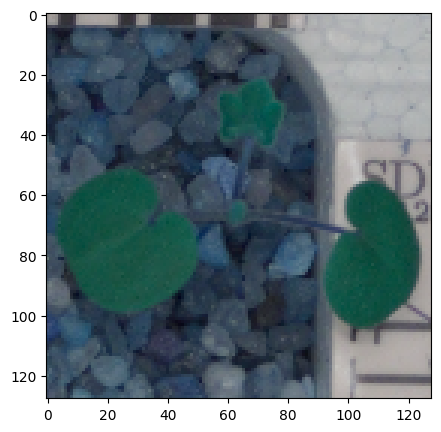

In [139]:
i=2
image = img[i]
label=y.iloc[i]
print(f'Label \n Name: {[label]}')
plt.imshow(image)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Loose Silky-bent'),
  Text(1, 0, 'Common Chickweed'),
  Text(2, 0, 'Scentless Mayweed'),
  Text(3, 0, 'Small-flowered Cranesbill'),
  Text(4, 0, 'Fat Hen'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Sugar beet'),
  Text(7, 0, 'Cleavers'),
  Text(8, 0, 'Black-grass'),
  Text(9, 0, 'Shepherds Purse'),
  Text(10, 0, 'Common wheat'),
  Text(11, 0, 'Maize')])

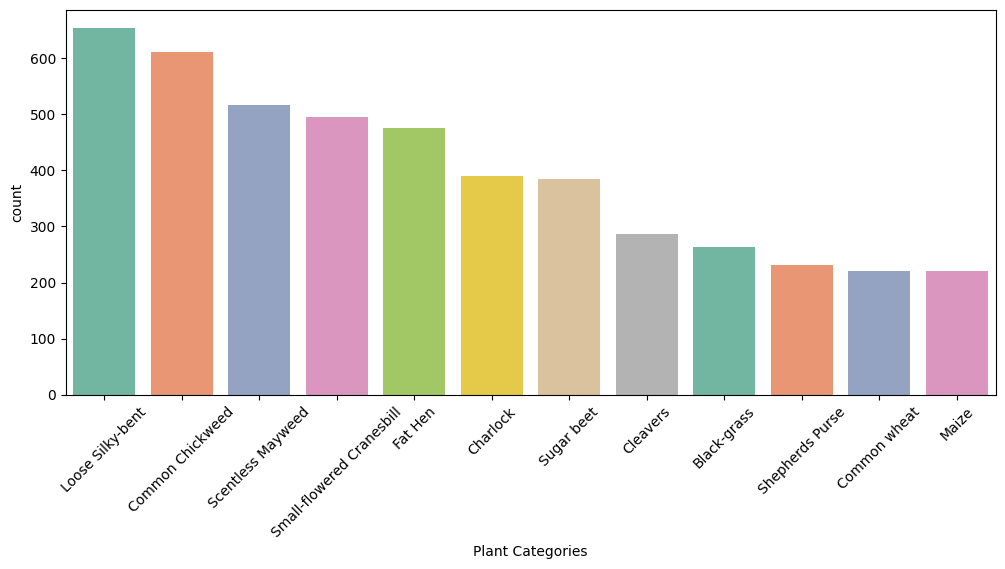

In [140]:
# Plot Plant categories distribution
plt.rcParams["figure.figsize"] = (12,5)
sns.countplot(x=y.iloc[:,-1],order = y['Label'].value_counts().index, palette='Set2')
plt.xlabel('Plant Categories')
plt.xticks(rotation=45)


- "Loose Silky bent" plant samples are more compared to other categories
- Least plant samples are for "Common Wheat", "Maize"

**Plot different plan categories**

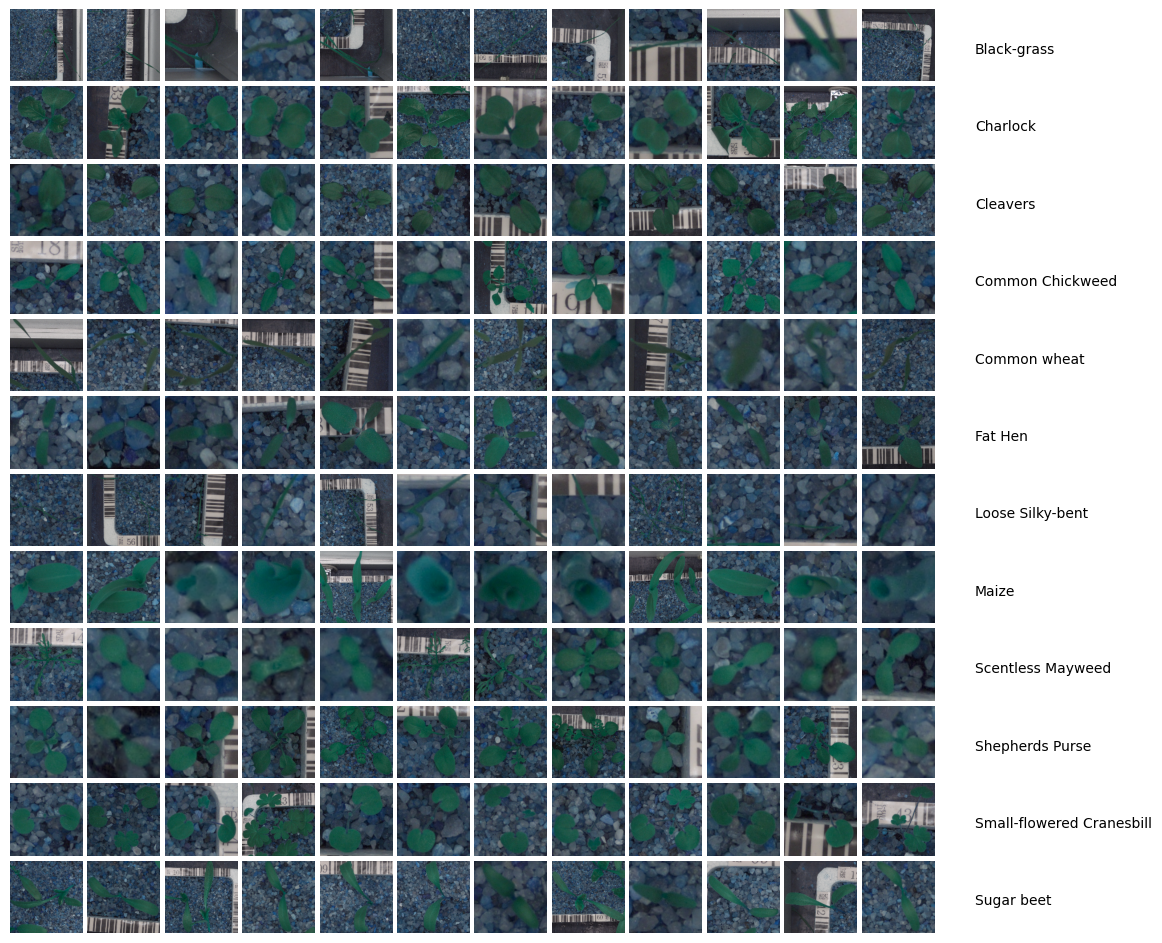

In [141]:
#Importing ImageGrid to plot the plant sample images
from mpl_toolkits.axes_grid1 import ImageGrid
# get the uinque categories innto a list and assign to num_categ
categories = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
num_categ = len(categories)

fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = y.index

#Plottting 12 images from each plant category
for category_id, category in enumerate(categories):
  condition = y["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      ax.imshow(img[plant_indices[j]])
      ax.axis('off')
      if i % num_categ == num_categ - 1:
        #printing the names for each caterogy
        ax.text(200, 70, category, verticalalignment='center')
      i += 1
plt.show();



**Data Preprocessing**

Normalization

In [142]:
img=img.astype('float32')
img=img / 255.0

Gaussian Blurring

In [143]:
# Applying Gaussian Blurring to reduce noise and details
for idx, imag in enumerate(img):
  img[idx] = cv2.GaussianBlur(imag, (5, 5), 0)

Visualize after pre-processing using Gaussian Blurring

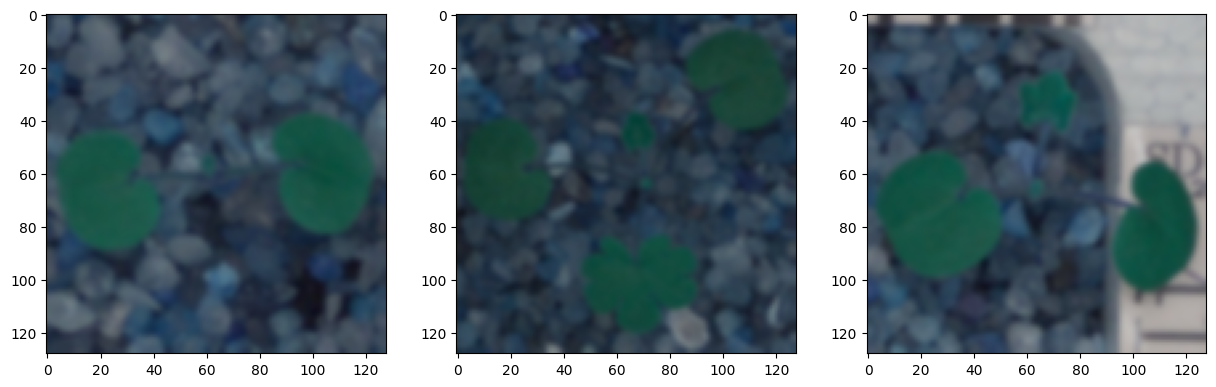

In [144]:
# Visualize 3 images after applying Normalization and Gaussian Blurring on training dataset
plt.figure(figsize=(15, 15))
for i in range(3):
    plt.subplot(330 + 1 + i)
    plt.imshow(img[i], cmap = plt.get_cmap('RdYlGn'))
plt.show()

Convert lables to one-hot vectors

In [145]:
#Create LabelEncoder object
lEncoding =LabelEncoder()

#Apply label encoding to dependent data set

yEncoded = lEncoding.fit_transform(y)


#Convert target feature into categorical variables
#12 classes are used as there are 12 different types of weeds in the dataset.
y=tf.keras.utils.to_categorical(yEncoded, num_classes = 12)

/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Splitting data into Test, Train and Validation Sets**

Split the data set ito training and testing set with test_size=0.3

In [146]:
X_train ,X_test,y_train,y_test=train_test_split(img,y,test_size=0.30,random_state=1)

In [147]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(1425, 128, 128, 3)
(3325, 12)
(1425, 12)


**Further split the test data into test and validation set with test_size=0.5**


In [148]:
X_train,X_validate,y_train,y_validate=train_test_split(X_test,y_test,test_size=0.50,random_state=1)

**Check the shape of train, test and validate data**

In [149]:
#Check the shape of train, test and validate data
print(X_train.shape)
print(X_test.shape)
print(X_validate.shape)
print(y_train.shape)
print(y_test.shape)
print(y_validate.shape)

(712, 128, 128, 3)
(1425, 128, 128, 3)
(713, 128, 128, 3)
(712, 12)
(1425, 12)
(713, 12)


**Building CNN**

In [150]:
# Create CNN mode; architecture
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])


model = Sequential()   
# Create Sequential object
model.add(InputLayer(input_shape=(128,128,3,)))
# Input layer
model.add(data_augmentation) 

# Data Augmentaton Layer 
model.add(Conv2D(256, kernel_size=(5,5), padding = "same", activation='relu'))                 
# 2D Convolution layer
model.add(MaxPool2D(pool_size = (2,2)))                                                        
# Max Pool layer 
model.add(BatchNormalization())                                                                

# Normalization layer
model.add(Conv2D(128, kernel_size=(3,3), padding = "same", activation='relu'))                  
# 2D Convolution layer
model.add(MaxPool2D(pool_size = (2,2)))                                                         
# Max Pool layer 
model.add(BatchNormalization())                                                                 

#Normalization layer
model.add(Conv2D(256, kernel_size=(5,5), padding = "same", activation='relu'))                 
# 2D Convolution layer
model.add(MaxPool2D(pool_size = (2,2)))                                                        
# Max Pool layer 
model.add(BatchNormalization())                                                            


#Normalization layer
model.add(Conv2D(128, kernel_size=(3,3), padding = "same", activation='relu'))
# 2D Convolution layer
model.add(MaxPool2D(pool_size = (2,2)))                                                         
# Max Pool layer 
model.add(BatchNormalization())                                                                 

#Flatten the data
model.add(Flatten()) 

#Dense Layer
model.add(Dense(256, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))
#Output layer
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 256)     19456     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 256)      0         
 g2D)                                                            
                                                                 
 batch_normalization_16 (Bat  (None, 64, 64, 256)      1024      
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 128)       295040    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 32, 32, 128)     

**Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)**

In [151]:
# Compile the model using Adam optimizer and loss as categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

**Fit and evaluate model and print confusion matrix¶**


In [152]:
# Fit the model on training dataset
history = model.fit(X_train, y_train, epochs = 45, validation_data = (X_validate,y_validate), batch_size = 32, verbose = 1)

Epoch 1/45
23/23 [==============================] - 62s 3s/step - loss: 3.8007 - accuracy: 0.1924 - val_loss: 3.7921 - val_accuracy: 0.1459
Epoch 2/45
23/23 [==============================] - 59s 3s/step - loss: 2.7173 - accuracy: 0.3469 - val_loss: 8.8454 - val_accuracy: 0.1220
Epoch 3/45
23/23 [==============================] - 59s 3s/step - loss: 2.1393 - accuracy: 0.4003 - val_loss: 7.3785 - val_accuracy: 0.1248
Epoch 4/45
23/23 [==============================] - 58s 3s/step - loss: 1.8678 - accuracy: 0.4003 - val_loss: 16.0086 - val_accuracy: 0.1234
Epoch 5/45
23/23 [==============================] - 58s 3s/step - loss: 1.6082 - accuracy: 0.4663 - val_loss: 10.9644 - val_accuracy: 0.1234
Epoch 6/45
23/23 [==============================] - 58s 3s/step - loss: 1.4768 - accuracy: 0.5098 - val_loss: 19.7521 - val_accuracy: 0.1234
Epoch 7/45
23/23 [==============================] - 58s 3s/step - loss: 1.4959 - accuracy: 0.5014 - val_loss: 18.7346 - val_accuracy: 0.1234
Epoch 8/45
23/23

**Evaluate Model and Print Confusion Matrix**

**Confusion Matrix**

45/45 [==============================] - 25s 565ms/step


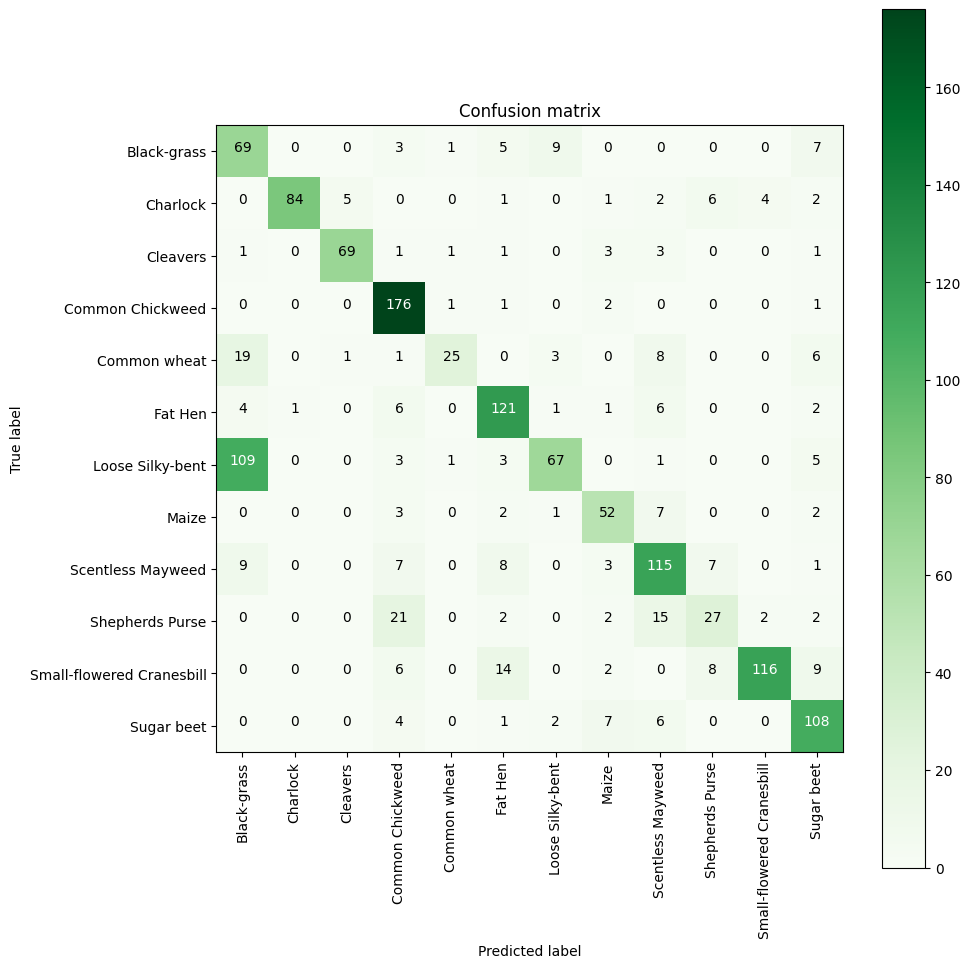

In [155]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    
    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY = model.predict(X_test)
predYClasses = np.argmax(predY, axis = 1) 
trueY = np.argmax(y_test, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = categories) 

There are some issues in the model. It didn't work well for Common wheat (19 off the grid) and Loose Sikly bent

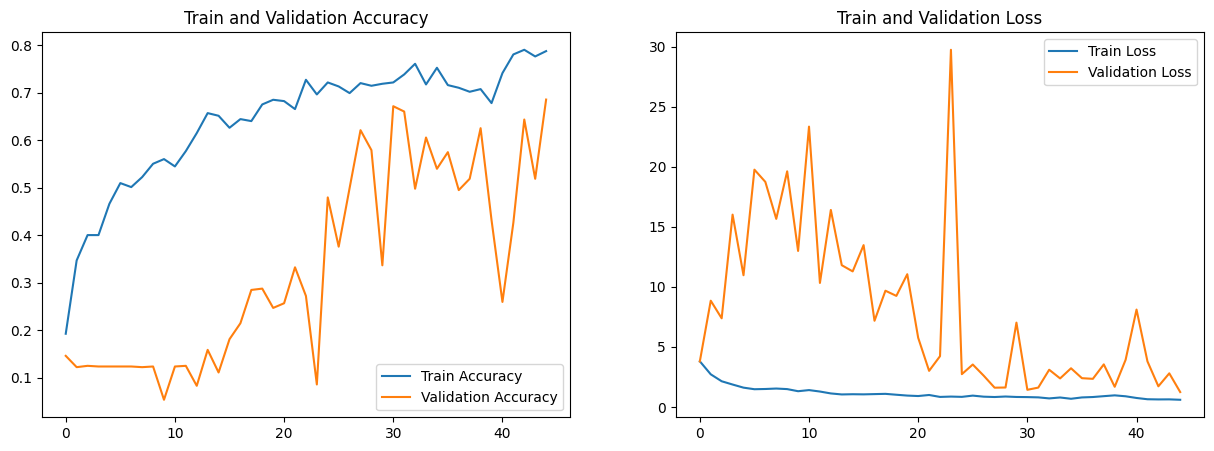

In [156]:
# plot accuracy and loss per epoch
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Train and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train and Validation Loss')
plt.show()


**Conclusion**

We attempted to build CNN model to predict the class of a plant. The current model is not accuracte. We can get good accuracy by increasing the number of epochs and also adding more layers.